<a href="https://colab.research.google.com/github/Eunhasuiin/Tensorflow-DeepLearning-Programing/blob/main/TDP_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Mean Square Error loss function

In [ ]:
import numpy as np

#Mean square error calculate without tensorflow
def MSE(y,t): return np.sum((y-t)**2)/t.size 

t=np.array([1,2,3,4])
y1=np.array([0.5, 1, 1.5, 2])
print("MSE(y1,t) == ", MSE(y1,t))

y2=np.array([0.5, 1.5, 2.5, 3.5])
print("MSE(y2,t) == ", MSE(y2,t))

MSE(y1,t) ==  1.875
MSE(y2,t) ==  0.25


In [ ]:
import numpy as np
import tensorflow as tf

#calculate with reduce_mean() and square()
def MSE(y, t): return tf.reduce_mean(tf.square(y-t)) # It calculate first (y-t) ** 2 and get mean

t=np.array([1,2,3,4])
y1=np.array([0.5, 1, 1.5, 2])
print("MSE(y1,t) == ", MSE(y1,t).numpy()) # if there is not .numpy() -> MSE(y1,t) ==  tf.Tensor(1.875, shape=(), dtype=float64)

y2=np.array([0.5, 1.5, 2.5, 3.5])
print("MSE(y2,t) == ", MSE(y2,t).numpy()) # if there is not .numpy() -> MSE(y2,t) ==  tf.Tensor(0.25, shape=(), dtype=float64)

MSE(y1,t) ==  1.875
MSE(y2,t) ==  0.25


In [ ]:
import numpy as np
import tensorflow as tf

MSE=tf.keras.losses.MeanSquaredError() #make MSE to made funcion from keras

t=np.array([1,2,3,4])
t=tf.convert_to_tensor(t, dtype=tf.float32) #t is int32

y1=np.array([0.5, 1, 1.5, 2])
print("MSE(y1,t) == ", MSE(y1,t).numpy()) # if there is not .numpy() -> MSE(y1,t) ==  tf.Tensor(1.875, shape=(), dtype=float64)

y2=np.array([0.5, 1.5, 2.5, 3.5])
print("MSE(y2,t) == ", MSE(y2,t).numpy()) # if there is not .numpy() -> MSE(y2,t) ==  tf.Tensor(0.25, shape=(), dtype=float64)

MSE(y1,t) ==  1.875
MSE(y2,t) ==  0.25


# II Numpy simple linear regrssion

## 1. Gredient Decent

epoch=0: w=  0.9217, b=  0.0550, loss=  0.2144
epoch=10: w=  0.9920, b=  0.0607, loss=  0.0010
epoch=20: w=  0.9925, b=  0.0574, loss=  0.0009
epoch=30: w=  0.9929, b=  0.0543, loss=  0.0008
epoch=40: w=  0.9933, b=  0.0514, loss=  0.0007
epoch=50: w=  0.9936, b=  0.0486, loss=  0.0007
epoch=60: w=  0.9940, b=  0.0459, loss=  0.0006
epoch=70: w=  0.9943, b=  0.0434, loss=  0.0005
epoch=80: w=  0.9946, b=  0.0411, loss=  0.0005
epoch=90: w=  0.9949, b=  0.0389, loss=  0.0004
epoch=100: w=  0.9952, b=  0.0368, loss=  0.0004
epoch=110: w=  0.9954, b=  0.0348, loss=  0.0003
epoch=120: w=  0.9957, b=  0.0329, loss=  0.0003
epoch=130: w=  0.9959, b=  0.0311, loss=  0.0003
epoch=140: w=  0.9961, b=  0.0294, loss=  0.0002
epoch=150: w=  0.9963, b=  0.0278, loss=  0.0002
epoch=160: w=  0.9965, b=  0.0263, loss=  0.0002
epoch=170: w=  0.9967, b=  0.0249, loss=  0.0002
epoch=180: w=  0.9969, b=  0.0235, loss=  0.0002
epoch=190: w=  0.9971, b=  0.0223, loss=  0.0001
w=0.9972, b=0.0212, loss=0.0001

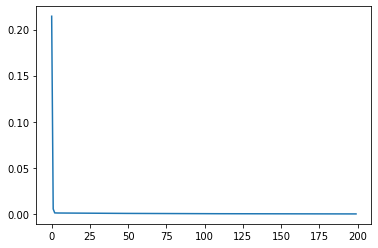

In [ ]:
import numpy as np
def MSE(y,t): return np.sum((y-t)**2)/t.size  #loss function

x=np.arange(12)
t=np.arange(12)
loss_list=[]

#hyper_parameter setting
w=0.5
b=0
lr=1e-2

for epoch in range(200):
  y=w*x+b #2_dim linear function
  dW=np.sum((y-t)*x)*2/(x.size) # It came from f`(MSE)= (1/N) * sum((y-t)**2) y to w*x+b and partial derivative w
  dB=np.sum((y-t))*2/(x.size) # It came from f`(MSE)= (1/N) * sum((y-t)**2) y to w*x+b and partial derivative b

  w-=lr*dW #find next value of w
  b-=lr*dB #find next value of b

  y=w*x+b
  loss=MSE(y,t) #caclulate result of this epoch
  loss_list.append(loss)
  if not epoch % 10: print("epoch={}: w={:>8.4f}, b={:>8.4f}, loss={:>8.4f}".format(epoch, w, b, loss))

print("w={:>.4f}, b={:>.4f}, loss={:>.4f}".format(w, b, loss))

import matplotlib.pyplot as plt
plt.plot(loss_list)
plt.show()

epoch=0: w=  0.5094, b=  0.0015, loss=  7.6908
epoch=10: w=  0.6136, b=  0.0152, loss=  3.3681
epoch=20: w=  0.7001, b=  0.0265, loss=  5.1572
epoch=30: w=  0.7708, b=  0.0353, loss=  1.6832
epoch=40: w=  0.8193, b=  0.0415, loss=  1.6821
epoch=50: w=  0.8597, b=  0.0468, loss=  0.8679
epoch=60: w=  0.8917, b=  0.0508, loss=  0.4422
epoch=70: w=  0.9130, b=  0.0537, loss=  0.1934
epoch=80: w=  0.9324, b=  0.0561, loss=  0.1766
epoch=90: w=  0.9449, b=  0.0576, loss=  0.1045
w=  0.9547, b=  0.0588, loss=  0.0826


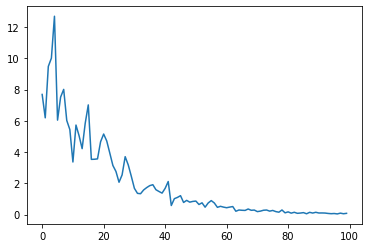

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def MSE(y,t):
  return np.sum((y-t)**2) / t.size

x=np.arange(12)
t=np.arange(12)

#set hyper parameter
w=0.5
b=0
lr=0.0001
loss_list=[]

train_size=t.size
batch_size=4
K=train_size // batch_size

for epoch in range(100):
  loss=0
  for step in range(K):
    mask=np.random.choice(train_size, batch_size)
    x_batch=x[mask]
    t_batch=t[mask]

    y= w*x_batch + b
    dW=np.sum((y-t_batch)*x_batch)*2 / batch_size
    dB=np.sum((y-t_batch))*2 / batch_size

    w-= lr*dW
    b-= lr*dB

    y=w*x_batch + b
    loss+=MSE(y, t_batch)
  loss/=K
  loss_list.append(loss)

  if not epoch % 10: print("epoch={}: w={:>8.4f}, b={:>8.4f}, loss={:>8.4f}".format(epoch, w, b, loss))

print("w={:>8.4f}, b={:>8.4f}, loss={:>8.4f}".format(w, b, loss))

import matplotlib.pyplot as plt
plt.plot(loss_list)
plt.show()

#III auto derivative calculation

In [ ]:
import tensorflow as tf

x=tf.Variable(2.0); y=tf.Variable(3.0)

with tf.GradientTape() as tape: 
  z=x**2+y**2
dx,dy=tape.gradient(z,[x,y]) #auto calculate partial derivative

print(dx.numpy()); print(dy.numpy())

4.0
6.0


In [ ]:
import tensorflow as tf

x=tf.Variable(2.0); y=tf.Variable(3.0)

with tf.GradientTape(persistent=True) as tape: #persistnt is simply maintain function INF
  tape.watch(x); 
  tape.watch(y)
  z=x**2+y**2
dx=tape.gradient(z,x)
dy=tape.gradient(z,y)
#dx,dy=tape.gradient(z,[x,y]) #auto calculate partial derivative

print(dx.numpy()); print(dy.numpy())

4.0
6.0


In [ ]:
import tensorflow as tf

x=tf.Variable(2.0); y=tf.Variable(3.0)

with tf.GradientTape(watch_accessed_variables=False) as tape: #watch_accessed_variable is mean if you want GradientTape watch your Global variable
  tape.watch(x); 
  tape.watch(y)
  z=x**2+y**2

dx,dy=tape.gradient(z,[x,y]) #auto calculate partial derivative

print(dx.numpy()); print(dy.numpy())

4.0
6.0


In [ ]:
import tensorflow as tf

x=tf.Variable(3.0)

with tf.GradientTape() as tape2:
  with tf.GradientTape() as tape1:
    y= x**3
  dy=tape1.gradient(y,x)
dy2=tape2.gradient(dy,x)

print(dy.numpy())
print(dy2.numpy())

27.0
18.0


#IV simple linear regression with tensorflow

w=0.9951, b=0.0370, loss=0.0004


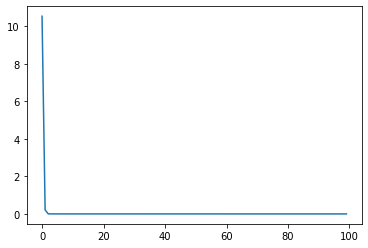

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

x=np.arange(12)
t=np.arange(12)


#hyper parameter
w=tf.Variable(0.5)
b=tf.Variable(0.0)

lr=0.01

loss_list=[]
for epoch in range(100):
  with tf.GradientTape() as tape:
    y=w*x+b
    loss=tf.reduce_mean(tf.square(y-t))
  loss_list.append(loss)

  dW, dB=tape.gradient(loss,[w,b]) #loss값을 기준으로 하는 w와 b의 편미분 값
  w.assign_sub(dW*lr)
  b.assign_sub(dB*lr)

print("w={:>.4f}, b={:>.4f}, loss={:>.4f}".format(w.numpy(), b.numpy(), loss.numpy()))

plt.plot(loss_list)
plt.show()

w=0.9986, b=0.0104, batch loss=0.0000


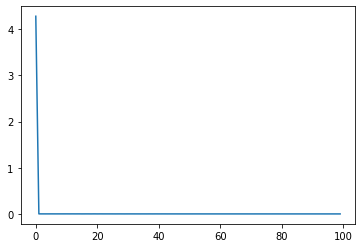

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

x=np.arange(12)
t=np.arange(12)

#hyper parameter
w=tf.Variable(0.5)
b=tf.Variable(0.0)
lr=0.01

train_size=x.size
batch_size=4
K=train_size//batch_size

loss_list=[]

for epoch in range(100):
  batch_loss=0.0
  for step in range(K):
    mask=np.random.choice(train_size, batch_size)
    x_batch=x[mask]
    t_batch=t[mask]

    with tf.GradientTape() as tape:
      y=w*x_batch + b
      loss=tf.reduce_mean(tf.square(y-t_batch))

    dW, dB = tape.gradient(loss,[w,b])
    w.assign_sub(lr*dW)
    b.assign_sub(lr*dB)
    batch_loss += loss.numpy()

  batch_loss/=K #loss의 평균 산출
  loss_list.append(batch_loss)

print("w={:>.4f}, b={:>.4f}, batch loss={:>.4f}".format(w.numpy(), b.numpy(), batch_loss))

plt.plot(loss_list)
plt.show()  

#V.Multivariable Linear Regression

In [7]:
import numpy as np
import tensorflow as tf

MSE=tf.keras.losses.MeanSquaredError()

train_data=np.array([ #X is 8X2 array t is 8X1 array
#   x1,x2,t
    [1,0,4],
    [2,0,5],
    [3,0,6],
    [4,0,7],
    [1,1,6],
    [2,1,7],
    [3,1,8],
    [4,1,9]], dtype=np.float32
)

X=train_data[:,:-1]
t=train_data[:,-1:]
print('X:',X)
print('t:',t)

tf.random.set_seed(1)
W=tf.Variable(tf.random.normal(shape=[2,1]),) #2X1 array
b=tf.Variable(tf.random.normal(shape=[1]))
print("W=",W.numpy())
print("b=",b.numpy())

y=tf.matmul(X,W)+b
print("y:",y)

loss=MSE(y,t)
print("MSE:",loss.numpy())

X: [[1. 0.]
 [2. 0.]
 [3. 0.]
 [4. 0.]
 [1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]]
t: [[4.]
 [5.]
 [6.]
 [7.]
 [6.]
 [7.]
 [8.]
 [9.]]
W= [[-1.1012203]
 [ 1.5457517]]
b= [0.40308788]
y: tf.Tensor(
[[-0.6981324 ]
 [-1.7993526 ]
 [-2.900573  ]
 [-4.001793  ]
 [ 0.8476193 ]
 [-0.25360093]
 [-1.3548213 ]
 [-2.4560416 ]], shape=(8, 1), dtype=float32)
MSE: 70.80983


X: [[1. 0.]
 [2. 0.]
 [3. 0.]
 [4. 0.]
 [1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]]
t: [[4.]
 [5.]
 [6.]
 [7.]
 [6.]
 [7.]
 [8.]
 [9.]]
w=[[1.0357455]
 [2.059502 ]], b=[2.8647404], loss=0.002744261408224702


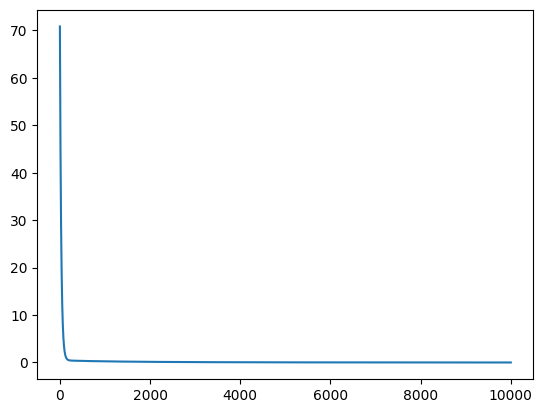

In [21]:
from tensorflow.python.eager.backprop import GradientTape
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

MSE=tf.keras.losses.MeanSquaredError()


train_data=np.array([ #X is 8X2 array t is 8X1 array
#   x1,x2,t
    [1,0,4],
    [2,0,5],
    [3,0,6],
    [4,0,7],
    [1,1,6],
    [2,1,7],
    [3,1,8],
    [4,1,9]], dtype=np.float32
)

X=train_data[:,:-1]
t=train_data[:,-1:]
print('X:',X)
print('t:',t)

tf.random.set_seed(1)
W=tf.Variable(tf.random.normal(shape=[2,1]),) #2X1 array
b=tf.Variable(tf.random.normal(shape=[1]))
loss_list=[]
lr=0.001

for epoch in range(10000):
  with tf.GradientTape() as tape:
    y=tf.matmul(X,W)+b
    loss=MSE(y,t)
  loss_list.append(loss)
  dW,dB=tape.gradient(loss,[W,b])
  W.assign_sub(lr*dW)
  b.assign_sub(lr*dB)

print("w={}, b={}, loss={}".format(W.numpy(), b.numpy(), loss.numpy()))

plt.plot(loss_list)
plt.show()

X: [[1. 0.]
 [2. 0.]
 [3. 0.]
 [4. 0.]
 [1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]]
t: [[4.]
 [5.]
 [6.]
 [7.]
 [6.]
 [7.]
 [8.]
 [9.]]
w=[[1.0034047]
 [2.0057724]], b=[2.987491], loss=1.3143091564415954e-05


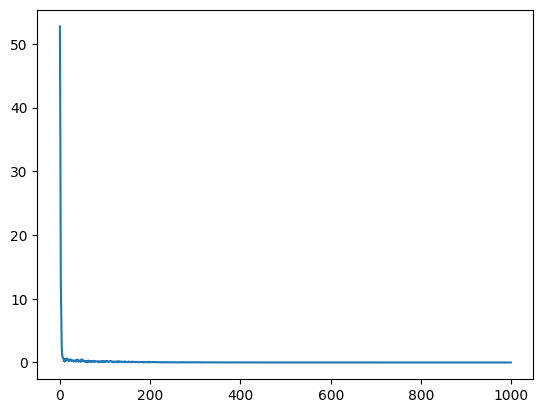

In [45]:
from tensorflow.python.eager.backprop import GradientTape
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

MSE=tf.keras.losses.MeanSquaredError()


train_data=np.array([ #X is 8X2 array t is 8X1 array
#   x1,x2,t
    [1,0,4],
    [2,0,5],
    [3,0,6],
    [4,0,7],
    [1,1,6],
    [2,1,7],
    [3,1,8],
    [4,1,9]], dtype=np.float32
)

X=train_data[:,:-1]
t=train_data[:,-1:]
print('X:',X)
print('t:',t)

tf.random.set_seed(1)
W=tf.Variable(tf.random.normal(shape=[2,1]),) #2X1 array
b=tf.Variable(tf.random.normal(shape=[1]))
loss_list=[]
lr=0.01

train_size=X.shape[0]
batch_size=4
K=train_size//batch_size

for epoch in range(1000):
  batch_loss=0.0
  for step in range(K):
    mask=np.random.choice(train_size, batch_size)
    X_mask=X[mask]
    t_mask=t[mask]

    with tf.GradientTape() as tape:
      y=tf.matmul(X_mask,W) + b
      loss=MSE(y,t_mask)

    batch_loss+=loss.numpy()

    dW, dB = tape.gradient(loss, [W,b])
    W.assign_sub(lr*dW)
    b.assign_sub(lr*dB)

  batch_loss/=K
  loss_list.append(batch_loss)

print("w={}, b={}, loss={}".format(W.numpy(), b.numpy(), loss.numpy()))

plt.plot(loss_list)
plt.show()

# VI training with tf.keras.optimizers

w=0.00000, b=0.00000, loss=0.0


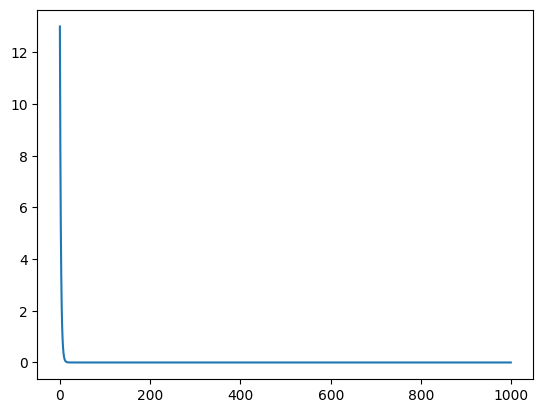

In [48]:
import tensorflow as tf
import matplotlib.pyplot as plt

x=tf.Variable(2.0)
y=tf.Variable(3.0)

opt=tf.keras.optimizers.SGD(learning_rate=0.1)
#opt=tf.keras.optimiziers.Adagrad(0.1)
#opt=tf.keras.optimiziers.Adam(0.1)
#opt=tf.keras.optimiziers.RSMprop(0.1)

loss_list=[]
for epoch in range(int(1e3)):
  with tf.GradientTape() as tape:
    loss= x**2+y**2
  loss_list.append(loss)

  dx, dy= tape.gradient(loss,[x,y])
  grads_and_vars=zip([dx,dy],[x,y]) #make contents array pair like (dx,x) (dy,y)
  opt.apply_gradients(grads_and_vars) #input 	List of (gradient, variable) pairs.



print("w={:.5f}, b={:.5f}, loss={}".format(x.numpy(), y.numpy(), loss.numpy()))

plt.plot(loss_list)
plt.show()

epoch=0, error=8.320000648498535
epoch=10, error=0.09592308104038239
epoch=20, error=0.001105917850509286
epoch=30, error=1.275036447623279e-05
epoch=40, error=1.4700168549097725e-07
epoch=50, error=1.6948142889106066e-09
epoch=60, error=1.9539881865315856e-11
epoch=70, error=2.25279511842022e-13
epoch=80, error=2.5972956661649612e-15
epoch=90, error=2.9944778589921956e-17
epoch=100, error=3.4523980357458603e-19
epoch=110, error=3.9803438321975854e-21
epoch=120, error=4.5890247667240876e-23
epoch=130, error=5.290785567247384e-25
epoch=140, error=6.099860786645652e-27
epoch=150, error=7.032659581082592e-29
epoch=160, error=8.1081048805595e-31
epoch=170, error=9.348008622318852e-33
epoch=180, error=1.0777519955514143e-34
epoch=190, error=1.2425634997087808e-36
epoch=200, error=0.0
epoch=210, error=0.0
epoch=220, error=0.0
epoch=230, error=0.0
epoch=240, error=0.0
epoch=250, error=0.0
epoch=260, error=0.0
epoch=270, error=0.0
epoch=280, error=0.0
epoch=290, error=0.0
epoch=300, error=0.0


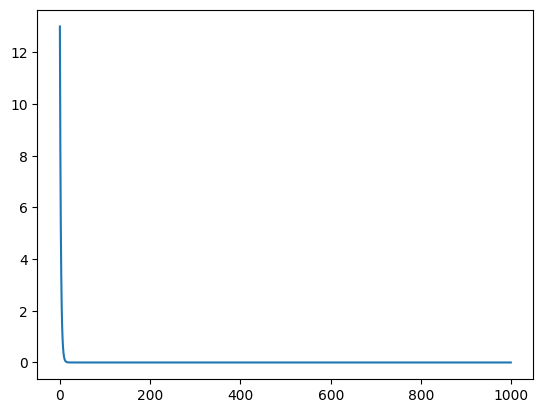

In [37]:
import tensorflow as tf
import matplotlib.pyplot as plt

x=tf.Variable(2.0)
y=tf.Variable(3.0)

opt=tf.keras.optimizers.SGD(learning_rate=0.1)
#opt=tf.keras.optimiziers.Adagrad(0.1)
#opt=tf.keras.optimiziers.Adam(0.1)
#opt=tf.keras.optimiziers.RSMprop(0.1)

loss_list=[]
for epoch in range(int(1e3)):
  loss=lambda: x**2+y**2
  loss_list.append(loss().numpy())

  opt.minimize(loss, var_list=[x,y]) #this function calculate under 3 function at once

  #dx, dy= tape.gradient(loss,[x,y])
  #grads_and_vars=zip([dx,dy],[x,y]) 
  #opt.apply_gradients(grads_and_vars) 

  if not epoch % 10:
    print("epoch={}, error={}".format(epoch, loss().numpy()))

print("w={:.5f}, b={:.5f}, loss={}".format(x.numpy(), y.numpy(), loss().numpy()))

plt.plot(loss_list)
plt.show()

X: [[1. 0.]
 [2. 0.]
 [3. 0.]
 [4. 0.]
 [1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]]
t: [[4.]
 [5.]
 [6.]
 [7.]
 [6.]
 [7.]
 [8.]
 [9.]]
w=[[1.0000007]
 [2.000002 ]], b=[2.999997], loss=1.8758328224066645e-12


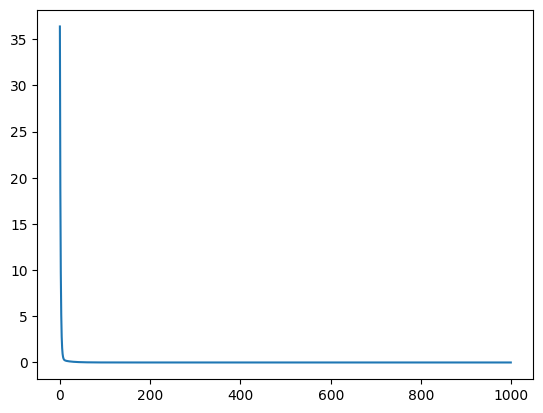

In [42]:
from tensorflow.python.eager.backprop import GradientTape
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

MSE=tf.keras.losses.MeanSquaredError()
def mse_loss():
  y=tf.matmul(X,W)+b
  return MSE(y,t)

opt=tf.keras.optimizers.SGD(learning_rate=0.1)
#opt=tf.keras.optimiziers.Adagrad(0.1)
#opt=tf.keras.optimiziers.Adam(0.1)
#opt=tf.keras.optimiziers.RSMprop(0.1)

train_data=np.array([ #X is 8X2 array t is 8X1 array
#   x1,x2,t
    [1,0,4],
    [2,0,5],
    [3,0,6],
    [4,0,7],
    [1,1,6],
    [2,1,7],
    [3,1,8],
    [4,1,9]], dtype=np.float32
)

X=train_data[:,:-1]
t=train_data[:,-1:]
print('X:',X)
print('t:',t)

tf.random.set_seed(1)
W=tf.Variable(tf.random.normal(shape=[2,1]),) #2X1 array
b=tf.Variable(tf.random.normal(shape=[1]))
loss_list=[]
lr=0.01

train_size=X.shape[0]
batch_size=4
K=train_size//batch_size

for epoch in range(1000):
  opt.minimize(mse_loss, var_list=[W,b])

  loss=mse_loss().numpy()
  loss_list.append(loss)

print("w={}, b={}, loss={}".format(W.numpy(), b.numpy(), loss))

plt.plot(loss_list)
plt.show()

X: [[1. 0.]
 [2. 0.]
 [3. 0.]
 [4. 0.]
 [1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]]
t: [[4.]
 [5.]
 [6.]
 [7.]
 [6.]
 [7.]
 [8.]
 [9.]]
w=[[1.       ]
 [2.0000005]], b=[2.9999998], loss=0.0


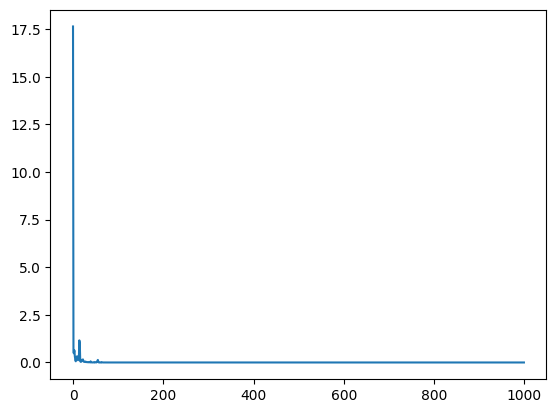

In [49]:
from tensorflow.python.eager.backprop import GradientTape
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

MSE=tf.keras.losses.MeanSquaredError()
def mse_loss():
  y=tf.matmul(X_mask,W)+b
  return MSE(y,t_mask)

opt=tf.keras.optimizers.SGD(learning_rate=0.1)
#opt=tf.keras.optimiziers.Adagrad(0.1)
#opt=tf.keras.optimiziers.Adam(0.1)
#opt=tf.keras.optimiziers.RSMprop(0.1)

train_data=np.array([ #X is 8X2 array t is 8X1 array
#   x1,x2,t
    [1,0,4],
    [2,0,5],
    [3,0,6],
    [4,0,7],
    [1,1,6],
    [2,1,7],
    [3,1,8],
    [4,1,9]], dtype=np.float32
)

X=train_data[:,:-1]
t=train_data[:,-1:]
print('X:',X)
print('t:',t)

tf.random.set_seed(1)
W=tf.Variable(tf.random.normal(shape=[2,1]),) #2X1 array
b=tf.Variable(tf.random.normal(shape=[1]))

train_size=X.shape[0]
batch_size=4
K=train_size//batch_size

loss_list=[]
for epoch in range(1000):
  batch_loss=0.0
  for step in range(K):
    mask=np.random.choice(train_size, batch_size)
    X_mask=X[mask]
    t_mask=t[mask]

    opt.minimize(mse_loss,var_list=[W,b])
    loss=mse_loss().numpy()
    batch_loss+=loss

  batch_loss/=K
  loss_list.append(batch_loss)

print("w={}, b={}, loss={}".format(W.numpy(), b.numpy(), loss))

plt.plot(loss_list)
plt.show()

# VII 다항식 회귀


epoch=0 loss=37.226837158203125
epoch=100 loss=12.824580192565918
epoch=200 loss=5.855209827423096
epoch=300 loss=3.433420181274414
epoch=400 loss=2.5918679237365723
epoch=500 loss=2.2994384765625
epoch=600 loss=2.197822093963623
epoch=700 loss=2.162510871887207
epoch=800 loss=2.1502411365509033
epoch=900 loss=2.14597749710083
w=3.135888, b=-10.972524, loss=2.1445038318634033


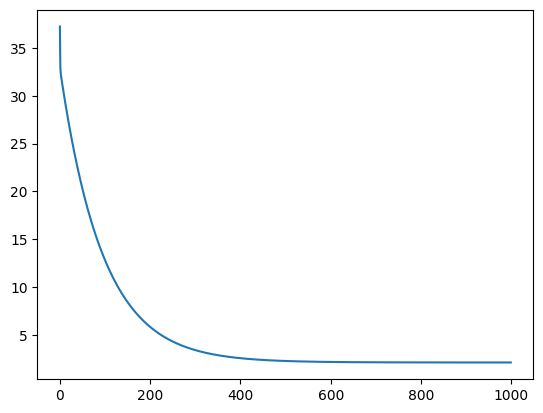

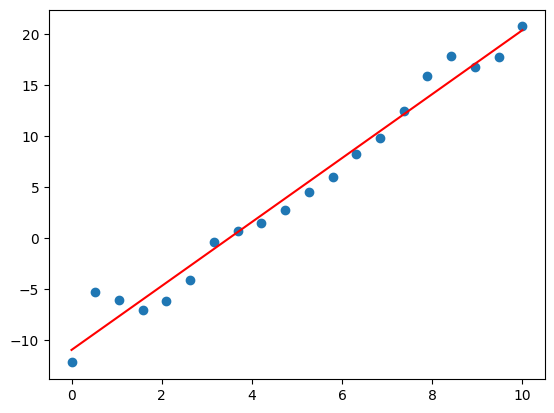

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

MSE=tf.keras.losses.MeanSquaredError()
def mse_loss():
  y=x*w+b
  return MSE(y,t)


EPOCH=1000;train_size=20

tf.random.set_seed(1)
x=tf.linspace(0.0,10.0,num=train_size)
w_true, b_true = 3, -10
t= x * w_true + b_true + tf.random.normal([train_size], mean=0.0, stddev=2.0)

w=tf.Variable(tf.random.normal([]))
b=tf.Variable(tf.random.normal([]))

opt=tf.keras.optimizers.SGD(0.01)

loss_list=[]
for epoch in range(EPOCH):
  opt.minimize(mse_loss,[w,b])

  loss=mse_loss().numpy()
  loss_list.append(loss)

  if not epoch % 100: print("epoch={} loss={}".format(epoch, loss))

print("w={:>4f}, b={:>4f}, loss={}".format(w.numpy(), b.numpy(), loss))

plt.plot(loss_list)
plt.show()

plt.scatter(x,t.numpy())
w_pred, b_pred= w.numpy(), b.numpy()
t_pred=x * w_pred + b_pred
plt.plot(x, t_pred, 'r-')
plt.show()

epoch=0 loss=544.3561401367188
epoch=10 loss=44.855995178222656
epoch=20 loss=31.653961181640625
epoch=30 loss=22.77134132385254
epoch=40 loss=16.641324996948242
epoch=50 loss=12.409049987792969
epoch=60 loss=9.485268592834473
epoch=70 loss=7.463749885559082
epoch=80 loss=6.064394474029541
epoch=90 loss=5.094084739685059
epoch=100 loss=4.4196858406066895
epoch=110 loss=3.9493942260742188
epoch=120 loss=3.6199183464050293
epoch=130 loss=3.387617826461792
epoch=140 loss=3.222407817840576
epoch=150 loss=3.1035397052764893
epoch=160 loss=3.016713857650757
epoch=170 loss=2.952064037322998
epoch=180 loss=2.902780771255493
epoch=190 loss=2.8641812801361084
epoch=200 loss=2.833024263381958
epoch=210 loss=2.807081699371338
epoch=220 loss=2.784810781478882
epoch=230 loss=2.765145778656006
epoch=240 loss=2.7473573684692383
epoch=250 loss=2.730928421020508
epoch=260 loss=2.715519428253174
epoch=270 loss=2.700878381729126
epoch=280 loss=2.686842679977417
epoch=290 loss=2.6732840538024902
epoch=300 

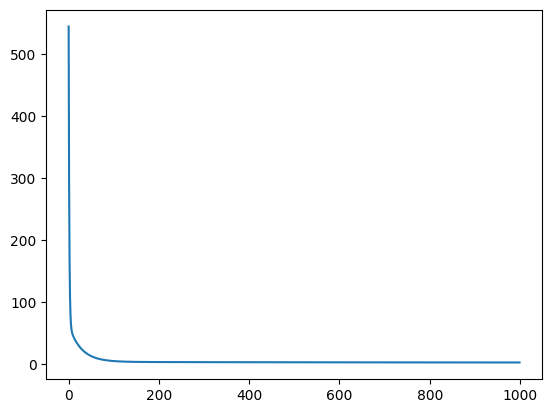

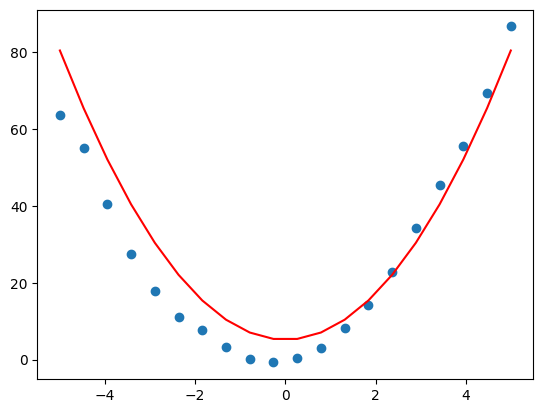

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

MSE=tf.keras.losses.MeanSquaredError()
def mse_loss():
  y=a * x ** 2 + b * x + c
  return MSE(y,t)


EPOCH=1000;train_size=20
#2
tf.random.set_seed(1)
x=tf.linspace(-5.0,5.0,num=train_size)

a_true =tf.Variable(3.0)
b_true =tf.Variable(2.0)
c_true =tf.Variable(1.0)

t=a_true*tf.pow(x,2) + b_true*x + c_true #2
t+= tf.random.normal([train_size], mean=0.0, stddev=2) #2

a=tf.Variable(tf.random.normal([]))
b=tf.Variable(tf.random.normal([]))
c=tf.Variable(tf.random.normal([]))

opt=tf.keras.optimizers.SGD(0.001)

loss_list=[]
for epoch in range(EPOCH):
  opt.minimize(mse_loss, [a,b,c])

  loss=mse_loss().numpy()
  loss_list.append(loss)

  if not epoch % 10: print("epoch={} loss={}".format(epoch, loss))

print("a={} b={} c={} loss={}".format(a.numpy(), b.numpy(), c.numpy(), loss)) #2
plt.plot(loss_list)
plt.show()

plt.scatter(x,t.numpy())
t_pred=a*tf.pow(x,2) + b*2 +c #2
plt.plot(x, t_pred, 'r-')
plt.show()

epoch=0 loss=116887.015625
epoch=100 loss=21676.001953125
epoch=200 loss=6637.5126953125
epoch=300 loss=2749.12060546875
epoch=400 loss=1326.599853515625
epoch=500 loss=889.1759643554688
epoch=600 loss=774.9925537109375
epoch=700 loss=743.7781982421875
epoch=800 loss=729.0
epoch=900 loss=716.5155029296875
w=[ 3.5896175 -1.6169069  2.9427285  0.1846685], b=-0.34825894236564636, loss=704.193603515625


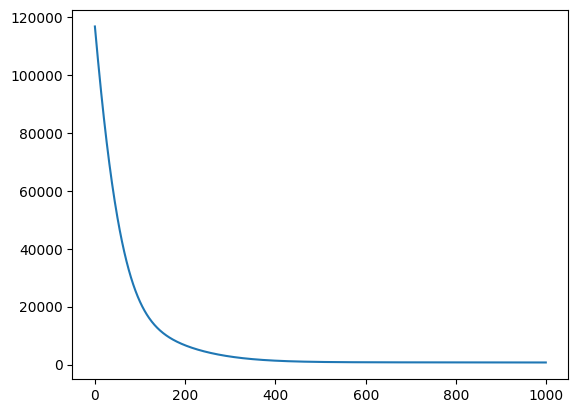

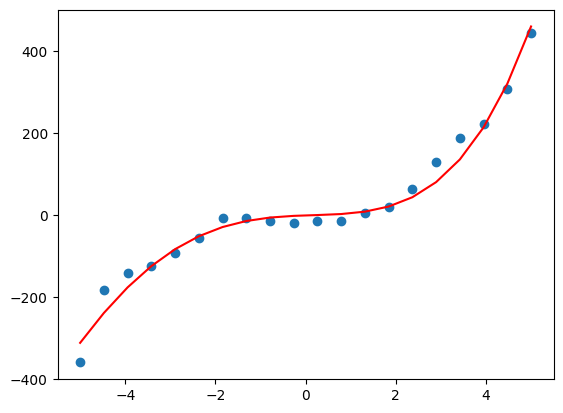

In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

MSE=tf.keras.losses.MeanSquaredError()
def mse_loss(): #n
  y= tf.zeros_like(x)
  for i in range(w.shape[0]):
    y+=w[i]*(x**(i+1))
  y+=b
  return MSE(y,t)


EPOCH=1000;train_size=20

tf.random.set_seed(1)
x=tf.linspace(-5.0, 5.0, num=train_size)
w_true=tf.Variable([1.0,2.0,3.0])
b_true=tf.Variable(4.0)

t=tf.zeros_like(x)
for i in range(len(w_true.numpy())): #n
  t += (x**(i+1)) * w_true[i]
t+=b_true
t+= tf.random.normal([train_size], mean=0.0, stddev=30) #3

n=4
w=tf.Variable(tf.random.normal([n]))
b=tf.Variable(tf.random.normal([]))

opt=tf.keras.optimizers.Adam(0.01)

loss_list=[]
for epoch in range(EPOCH):
  opt.minimize(mse_loss, [w,b])

  loss=mse_loss().numpy()
  loss_list.append(loss)
  if not epoch % 100: print("epoch={} loss={}".format(epoch, loss))

print("w={}, b={}, loss={}".format(w.numpy(), b.numpy(), loss))

plt.plot(loss_list)
plt.show()

#n
plt.scatter(x,t.numpy())
t_pred= tf.zeros_like(x) 
for i in range(w.shape[0]): t_pred+= w[i]*(x**(i+1))
t_pred+=b

plt.plot(x, t_pred, 'r-')
plt.show()

In [12]:
w_true=tf.Variable([1.0,2.0,3.0])
len(w_true.numpy())

3